In [1]:
from google.colab import drive
drive.mount("MyDrive")
%cd "MyDrive/MyDrive/NLP/Project"

Mounted at MyDrive
/content/MyDrive/MyDrive/NLP/Project


In [2]:
! ls

 2005.06557v2.pdf      'NLP Final Task.rar'			      pipeline.pkl
 dialects_database.db  'NLP_Project(1)_DataFetch.ipynb'		      text_and_dialect.csv
 hist.csv	       'NLP_Project(2)_EDA_DataPreprocessing.ipynb'   voting_pipeline.pkl
'NLP Final Task.pdf'   'NLP_Project(3)_ModelTraining_ipynb.ipynb'


In [2]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.6 MB/s eta 0:00:00


In [3]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stopwords_arabic = set(stopwords.words('arabic'))

    def fit(self, X, y=None):
        # Add code for fitting the transformer here
        return self

    def transform(self, X):
        transformed_X = X.copy()
        transformed_X = X.apply(self.clean_txt)
        return transformed_X

    def clean_txt(self, text):
        # Remove URLs
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)

        # Remove usernames starting with @
        text = re.sub(r'@[\w_]+', ' ', text)

        # Remove English words
        text = re.sub(r'\b[a-zA-Z]+\b', ' ', text)

        # Remove emojis
        text = re.sub(r'[\U00010000-\U0010ffff]', ' ', text)
        text = re.sub(r':[a-z_]+:', ' ', text)

        # Remove special characters
        text = re.sub('[*?!#@]', ' ', text)

        # Remove redundant percentage and bar lines
        text = re.sub(r'\|\|+\s*\d+%\s*\|\|+?[_\-\.\?]+', ' ', text)

        text = re.sub(r'[_\-\.\"\:\;\,\'\،\♡\\\)/(\&\؟]', ' ', text)

        # Remove digits
        text = re.sub(r'\d+', ' ', text)

        text_tokens = text.split()

        # filtered_text = [word for word in text_tokens if word not in self.stopwords_arabic]
        filtered_text = text_tokens
        # Split and rejoin
        text = ' '.join(filtered_text)

        return text

    def fit_transform(self, X, y=None):
        # This function combines fit and transform
        self.fit(X, y)
        return self.transform(X)

In [5]:
loaded_pipeline = joblib.load('voting_pipeline.pkl')

Enter your text: بزاف
{'Egypt': 0.001069481812935635, 'Lebanon': 0.002865665075812804, 'Libya': 0.006026604546755362, 'Morocco': 0.9838323574281892, 'Sudan': 0.00620589113630663}
Final Prediction: Morocco


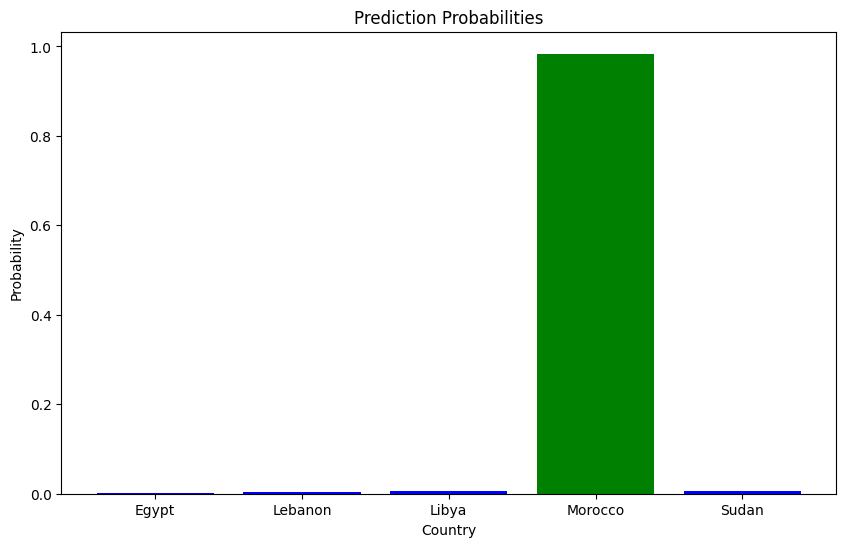

In [13]:
text = input("Enter your text: ")
text_series = pd.Series([text])
probabilities = loaded_pipeline.predict_proba(text_series)

target_labels = ['EG', 'LB', 'LY', 'MA', 'SD']
target_names = ['Egypt', 'Lebanon', 'Libya', 'Morocco', 'Sudan']

label_name_mapping = dict(zip(target_labels, target_names))

class_labels = loaded_pipeline.classes_

prob_dict = {label_name_mapping[label]: prob for label, prob in zip(class_labels, probabilities[0])}

final_prediction_label = loaded_pipeline.predict(text_series)[0]
final_prediction_name = label_name_mapping[final_prediction_label]

print(prob_dict)
print(f"Final Prediction: {final_prediction_name}")

# Plot the probabilities
labels = list(prob_dict.keys())
probs = list(prob_dict.values())

colors = ['blue' if label != final_prediction_name else 'green' for label in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, probs, color=colors)
plt.xlabel('Country')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.show()